# EDA  


#### Nombre:              Julio Gómez Expósito

#### Presentación:        12/01/2024 17:30

In [2]:
import pandas as pd
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
import pycountry

# CODIGO CUENTA CORRIENTE

In [3]:
ruta_carpeta = r'C:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\EDA_Entrega\src\data\data_comex'

In [4]:
archivos_csv = glob.glob(f"{ruta_carpeta}\\*.csv")

dataframes = [pd.read_csv(archivo, sep=';', encoding='latin1') for archivo in archivos_csv]

df_ci = pd.concat(dataframes, ignore_index=True)

In [5]:
columnas_deseadas = ['flujo_codigo', 'periodo_anio', 'pais_nombre', 'taric', 'euros']
df_ci = df_ci[columnas_deseadas]

In [6]:
# Filtrar columnas, caracteres no numéricos y convertir columnas
df_ci['euros'] = df_ci['euros'].replace(',', '.', regex=True).astype(float)
df_ci['periodo_anio'] = df_ci['periodo_anio'].astype(int)
df_ci['pais_nombre'] = df_ci['pais_nombre'].astype(str)

In [7]:
# Eliminar datos de 2023, ya que no están publicados los datos definitivos
df_ci = df_ci[df_ci['periodo_anio'] != 2023]

In [8]:
valores_no_deseados = [
    'Avituallamiento terceros', 'Azores;O.Am.,Pal.;Kirib. (h.31/12/00)',
    'Países y territ.no prec.raz.com.Intra.;Código País Especial',
    'Países y territorios no determinados.Extraco.',
    'Países y territorios no determinados.Intraco.',
    'Avituall.y combust.intercambios comunitarios',
    'Avituallamiento y combustible',
    'Países y territorios no determinados',
    'Alta mar fuera de las aguas territoriales',
    'Pesca altura origen otro estado miembro',
    'Operaciones Especiales (España) (h.31/12/99)',
    'España (excp.Ceuta y Melilla)',
    'Países y territ.no prec.raz.com.Extra.',
    'Países y territ.no precisad.raz.com.mili.',
    'Pesca altura origen España',
    'Oc.Holand.; Oc.Neozeland. (h.31/12/00)',
    'Regiones Polares (h.31/12/00)',
    'Melilla'
]

# Eliminar los valores no deseados de la columna 'pais_nombre'
df_ci = df_ci[~df_ci['pais_nombre'].isin(valores_no_deseados)]

In [9]:
# Diccionario de nombres a cambiar y su correspondiente valor 'correcto'
nombres_a_cambiar = {
    'Azores;O.Am.,Pal.;Kirib. (h.31/12/00)': 'Azores',
    'Burkina Faso (ant. Alto Volta)': 'Burkina Faso',
    'Camboya (Campuchea)': 'Camboya',
    'Corea del Norte (Rep.Pop.Dem.de Corea)': 'Corea del Norte',
    'Corea del Sur (Rep. de Corea)' :'Corea del Sur',
    'I.Marianas Norte;Oc.Australiana (h.31/12/00)': 'Islas Marianas',
    'Islas Fiyi(Fidji)': 'Islas Fiyi',
    'Islas Malvinas (Falkland)': 'Islas Malvinas',
    'Islas Virgenes (EEUU)': 'Islas Virgenes',
    'Islas Virgenes (GB)': 'Islas Virgenes',
    'Serbia y Montenegro (h.31/05/05)': 'Serbia',
    'Bélgica y Luxemburgo (h.31/12/98)': 'Bélgica',
    'Guadalupe (h.31/12/96)': 'Guadalupe',
    'Guyana Francesa (h.31/12/96)': 'Guyana Francesa',
    'Martinica (h.31/12/96)': 'Martinica',
    'Reunión (h.31/12/96)': 'Reunión',
    'Svalbard (archipiélago) (h.31/12/00)': 'Noruega',
    'Nueva Caledonia y dependencias' : 'Nueva Caledonia'
}

# Reemplazar los valores en la columna 'pais_nombre' con los valores del diccionario
df_ci.loc[:, 'pais_nombre'] = df_ci['pais_nombre'].replace(nombres_a_cambiar)

In [10]:
# Agrupar los valores de la columna 'pais_nombre' en continentes
regiones = {
    'Europa': [
        'Albania', 'Alemania', 'Andorra', 'Armenia', 'Austria', 'Azerbaiyán', 'Bélgica', 'Bielorrusia', 'Bosnia-Herzegovina',
        'Bulgaria', 'Chipre', 'Ciudad del Vaticano', 'Croacia', 'Dinamarca', 'Eslovaquia', 'Eslovenia', 'España',
        'Estonia', 'Finlandia', 'Francia', 'Georgia', 'Gibraltar', 'Grecia', 'Hungría', 'Irlanda', 'Islandia', 'Italia',
        'Kazajistán', 'Kosovo', 'Letonia', 'Liechtenstein', 'Lituania', 'Luxemburgo', 'Macedonia del Norte', 'Malta',
        'Moldavia', 'Mónaco', 'Montenegro', 'Noruega', 'Países Bajos', 'Polonia', 'Portugal', 'Reino Unido', 'República Checa',
        'Rumanía', 'Rusia', 'San Marino', 'Serbia', 'Suecia', 'Suiza', 'Turquía', 'Ucrania', 'Bielorusia','Islas Feroe'
    ],
    'Asia': [
        'Afganistán', 'Arabia Saudí', 'Bangladesh', 'Baréin', 'Brunei Darussalam', 'Bután', 'Camboya', 'Catar', 'China',
        'Corea del Norte', 'Corea del Sur', 'Emiratos Árabes Unidos', 'Filipinas', 'Hong-Kong', 'India', 'Indonesia', 'Irak',
        'Irán', 'Israel', 'Japón', 'Jordania', 'Kazajistán', 'Kirguistán', 'Kuwait', 'Laos', 'Líbano', 'Macao', 'Malasia',
        'Maldivas', 'Mongolia', 'Myanmar', 'Nepal', 'Omán', 'Pakistán', 'Palestina', 'Singapur', 'Siria', 'Sri Lanka', 'Tailandia',
        'Taiwán', 'Tayikistán', 'Timor Oriental', 'Turkmenistán', 'Uzbekistán', 'Vietnam', 'Yemen', 'Islas Maldivas',
    'Islas Cocos o islas Keeling', 'Azerbaiján', 'Bahrein', 'Cisjordania/Franja de Gaza', 'Kazajstán', 'Qatar', 'Tajikistán', 'Timor-Leste'
    ],
    'América': [
        'Anguila', 'Antigua y Barbuda', 'Argentina', 'Aruba', 'Bahamas', 'Barbados', 'Belice', 'Bermudas', 'Bolivia',
        'Bonaire, San Eustaquio y Saba', 'Brasil', 'Canadá', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'Curaçao',
        'Dominica', 'Ecuador', 'El Salvador', 'Estados Unidos', 'Granada', 'Guadalupe', 'Guatemala', 'Guyana', 'Guyana Francesa',
        'Haití', 'Honduras', 'Islas Caimán', 'Islas Malvinas', 'Islas Turcas y Caicos', 'Islas Vírgenes Británicas',
        'Islas Vírgenes de los Estados Unidos', 'Islas del Canal', 'Jamaica', 'Martinica', 'México', 'Montserrat', 'Nicaragua',
        'Panamá', 'Paraguay', 'Perú', 'Puerto Rico', 'República Dominicana', 'San Bartolomé', 'San Cristóbal y Nieves',
        'San Martín', 'San Pedro y Miquelón', 'Santa Lucía', 'San Vicente y las Granadinas', 'Sint Maarten', 'Surinam',
        'Trinidad y Tobago', 'Uruguay', 'Venezuela',
        'Anguilla', 'Antillas Neerlandesas', 'Groenlandia', 'Islas Malvinas', 'Islas Vírgenes', 'Islas Caimán',
        'Islas Turcas y Caicos', 'Islas Malvinas', 'Islas Falkland (Islas Malvinas)', 'Islas Vírgenes Británicas',
        'San Bartolomé', 'Sant Vicent y las Granadinas', 'Islas Vírgenes','San Vicente y Granadinas',
        'Georgia del Sur e Islas Sandwich del Sur','San Bartolomé','Islas Virgenes','Georgia del Sur e Islas Sandwich Sur','Sant Bartolomé'
    ],
    'África': [
        'Angola', 'Argelia', 'Benín', 'Botsuana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camerún', 'Chad', 'Comoras',
        'Congo', 'Costa de Marfil', 'Djibouti', 'Egipto', 'Eritrea', 'Esuatini', 'Etiopía', 'Gabón', 'Gambia', 'Ghana',
        'Guinea', 'Guinea-Bissau', 'Guinea Ecuatorial', 'Kenia', 'Lesotho', 'Liberia', 'Libia', 'Madagascar', 'Malawi', 'Territorio Británico Indico',
        'Malí', 'Marruecos', 'Mauricio', 'Mauritania', 'Mayotte', 'Mozambique', 'Namibia', 'Níger', 'Nigeria', 'República Árabe Saharaui Democrática',
        'República Centroafricana', 'República del Congo', 'Reunión', 'Ruanda', 'Santo Tomé y Príncipe', 'Senegal', 'Seychelles',
        'Sierra Leona', 'Somalia', 'Sudáfrica', 'Sudán', 'Sudán del Sur', 'Tanzania', 'Togo', 'Túnez', 'Uganda', 'Yibuti', 'Territorio Británico del Océano Índico',
        'Zambia', 'Zimbabue','Benin', 'Botswana', 'Guinea Bissau', 'Mali', 'R.D. del Congo', 'Santa Elena', 'Swazilandia', 'Zimbabwe', 'Sáhara Occidental'
    ],
    'Oceanía': [
        'Australia', 'Estados Federados de Micronesia', 'Fiyi', 'Guam', 'Islas Cook', 'Islas Marshall', 'Islas Salomón',
        'Kiribati', 'Nauru', 'Nueva Caledonia', 'Nueva Zelanda', 'Niue', 'Norfolk', 'Palaos', 'Papúa Nueva Guinea',
        'Pitcairn', 'Polinesia Francesa', 'Samoa', 'Samoa Americana', 'Islas Cocos', 'Territorio Antártico Británico',
        'Timor Oriental', 'Tokelau', 'Tonga', 'Tuvalu', 'Vanuatu', 'Wallis y Futuna', 'Islas Fiyi', 'Islas Marianas', 
        'Islas Marianas del Norte', 'Islas Salomón', 'Islas Tokelau', 'Islas Salomon','Islas Wallis y Futuna','Palau','Samoa Occidental',
        'Islas Menores alejadas Estados Unidos','Isla de Navidad','Tierras Australes y Antárticas Francesas','Micronesia Estados Federados',
        'Isla Norfolk','Isla Niue','Isla Navidad'
    ],
    'Antártida': [
        'Antártida', 'Georgia del Sur e Islas Sandwich del Sur', 'Isla Bouvet', 'Isla de Navidad', 'Isla de San Martín',
        'Isla Heard e Islas McDonald', 'Islas Åland', 'Islas Malvinas', 'Islas Pitcairn', 'Islas Svalbard y Jan Mayen',
        'Islas menores alejadas de los Estados Unidos', 'Islas Vírgenes de los Estados Unidos', 'Islas del Canal',
        'Islas Åland', 'Kosovo', 'República Árabe Saharaui Democrática', 'San Bartolomé', 'San Martín', 'Santa Elena, Ascensión y Tristán de Acuña',
        'Svalbard y Jan Mayen', 'Territorio Británico del Océano Índico', 'Tierras Australes y Antárticas Francesas','Tierras Australes Francesas'
    ]
}

In [11]:
# Asignar a cada país su continente
def asignar_region(pais):
    for region, paises_region in regiones.items():
        if pais in paises_region:
            return region
    return None  # En caso de que el país no esté en ninguna región especificada

df_ci['region'] = df_ci['pais_nombre'].apply(asignar_region)


In [12]:
# Este es el DF principal para la cuenta corriente, a partir del cual haremos los cálculos
df_ci.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579831 entries, 0 to 611742
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   flujo_codigo  579831 non-null  object 
 1   periodo_anio  579831 non-null  int32  
 2   pais_nombre   579831 non-null  object 
 3   taric         579831 non-null  int64  
 4   euros         579831 non-null  float64
 5   region        579831 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 28.8+ MB


**Dataset:**  
df_ci
 
**Descripción:**  
Datos sobre el comercio exterior en España  

**Periodo:**  
1995 - 2022

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|flujo_codigo|Nos indica si se trata de una Exportación o una Importación|Categórica nominal|0|||
|periodo_anio|Nos indica el año|Numérica discreta|2|||
|pais_nombre|Nos indica el país con el que se hizo la transacción|Categórica nominal|1|||
|taric|Nos indica el código arancelario de la mercancía|Categórica nominal|2|||
|euros|Nos indica el valor en euros de la mercancía|Numérica contínua|0|||
|region|Nos indica el continente|Categórica nominal|2|||

In [13]:
# Obtenemos información variada, en este caso, el pais modal
moda_pais_nombre = df_ci['pais_nombre'].mode()[0]
print("El país con el que más transacciones se ha hecho:", moda_pais_nombre)


El país con el que más transacciones se ha hecho: Francia


In [14]:
# Obtenemos información variada, en este caso, el pais con el que menos se comercia
menos_comun = df_ci['pais_nombre'].value_counts().idxmin()
print("El país con el que menos transacciones se ha hecho:", menos_comun)


El país con el que menos transacciones se ha hecho: Islas Marianas


In [15]:
# Obtenemos información variada, en este caso, la importación con mas valor del dataset
fila_max_euros_flujo_I = df_ci[df_ci['flujo_codigo'] == 'I'].loc[df_ci[df_ci['flujo_codigo'] == 'I']['euros'].idxmax()]

print('La importación que mas valor ha tenido en el dataset es:')
print(fila_max_euros_flujo_I[['periodo_anio', 'pais_nombre', 'taric', 'euros', 'flujo_codigo']])


La importación que mas valor ha tenido en el dataset es:
periodo_anio              2022
pais_nombre     Estados Unidos
taric                       27
euros           15983207950.83
flujo_codigo                 I
Name: 561788, dtype: object


La importación mas valorada fue en 2022, de EEUU, y se importaron COMBUSTIBLES

In [16]:
# Obtenemos información variada, en este caso, la exportación con mas valor del dataset
fila_max_euros_flujo_E = df_ci[df_ci['flujo_codigo'] == 'E'].loc[df_ci[df_ci['flujo_codigo'] == 'E']['euros'].idxmax()]

print('La exportación que mas valor ha tenido en el dataset es:')
print(fila_max_euros_flujo_E[['periodo_anio', 'pais_nombre', 'taric', 'euros', 'flujo_codigo']])


La exportación que mas valor ha tenido en el dataset es:
periodo_anio                  2022
pais_nombre                Bélgica
taric                           30
euros           12606698604.549999
flujo_codigo                     E
Name: 288005, dtype: object


La exportación mas valorada fue en 2022, a BELGICA, y se exportaron PRODUCTOS FARMACEUTICOS

In [17]:
#Calcular los totales
df_total_flujo_codigo = df_ci.groupby('flujo_codigo')['euros'].sum().reset_index()

# Transponer el DataFrame
df_total_balanza_comercial = df_total_flujo_codigo.T

# Establecer la primera fila como los nombres de las columnas
nuevos_nombres_columnas = df_total_balanza_comercial.iloc[0]
df_total_balanza_comercial = df_total_balanza_comercial[1:]
df_total_balanza_comercial.columns = nuevos_nombres_columnas

# Convertir las columnas 'E' e 'I' a tipo numérico
df_total_balanza_comercial['E'] = pd.to_numeric(df_total_balanza_comercial['E'])
df_total_balanza_comercial['I'] = pd.to_numeric(df_total_balanza_comercial['I'])

# Calcular la diferencia entre 'E' e 'I' y añadir una nueva columna
df_total_balanza_comercial['Saldo_balanza_comercial'] = df_total_balanza_comercial['E'] - df_total_balanza_comercial['I']

df_total_balanza_comercial

flujo_codigo,E,I,Saldo_balanza_comercial
euros,5.274093e+12,6.551530e+12,-1.277437e+12


In [27]:
# Calcular la variación porcentual de 'I' sobre 'E'
variacion_porcentual = ((df_total_balanza_comercial['I'] - df_total_balanza_comercial['E']) / df_total_balanza_comercial['E']) * 100

print("Variación Porcentual de I sobre E:", variacion_porcentual.values[0])


Variación Porcentual de I sobre E: 24.220980694268473


**df_total_balanza_comercial**  
Este dataframe nos muestra que el valor de las transacciones realizadas en España entre 1995 y 2022 es negativo, por lo que España ha importado bienes por más valor de los que los ha exportado

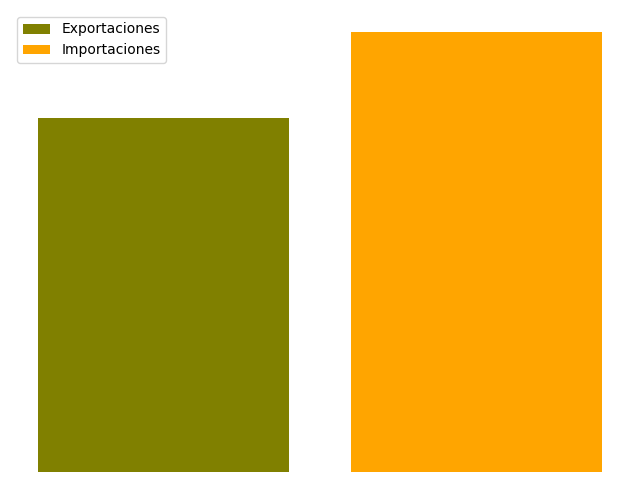

In [19]:
# Graficar los datos
plt.figure(figsize=(8, 6))  # Tamaño del gráfico

# Crear el gráfico de barras para 'E' (Exportaciones)
plt.bar('Exportaciones', df_total_balanza_comercial['E'], color='olive', label='Exportaciones')

# Crear el gráfico de barras para 'I' (Importaciones)
plt.bar('Importaciones', df_total_balanza_comercial['I'], color='orange', label='Importaciones')

# Ocultar ejes y etiquetas
plt.axis('off')  # Oculta los ejes
plt.tick_params(left=False, bottom=False)  # Oculta los ticks

# Mostrar el gráfico
plt.legend()
plt.show()


Aquí se muestra gráficamente el valor de todas las importaciones/exportaciones, se puede ver claramente que, a lo largo del dataset, España a importado por mas valor de lo que ha exportado

In [20]:
# Agrupar por 'flujo_codigo' y 'periodo_anio' y sumar los valores de 'euros'
df_total_flujo_codigo_anio = df_ci.groupby(['flujo_codigo', 'periodo_anio'])['euros'].sum().reset_index()

# Utilizar pivot para convertir los valores de 'flujo_codigo' en columnas
pivot_df = df_total_flujo_codigo_anio.pivot(index='periodo_anio', columns='flujo_codigo', values='euros').reset_index()

# Establecer 'periodo_anio' como el nuevo índice
pivot_df.set_index('periodo_anio', inplace=True)
pivot_df.index.name = None

pivot_df['diferencia_E_I'] = pivot_df['E'] - pivot_df['I']

pivot_df

flujo_codigo,E,I,diferencia_E_I
1995,6.928004e+10,8.713251e+10,-1.785248e+10
1996,7.727814e+10,9.417237e+10,-1.689423e+10
1997,9.226933e+10,1.094676e+11,-1.719825e+10
1998,9.873874e+10,1.228560e+11,-2.411723e+10
1999,1.034699e+11,1.390929e+11,-3.562292e+10
2000,1.219018e+11,1.694669e+11,-4.756513e+10
2001,1.275642e+11,1.732101e+11,-4.564588e+10
2002,1.313357e+11,1.752651e+11,-4.392938e+10
2003,1.358451e+11,1.850758e+11,-4.923073e+10
2004,1.442792e+11,2.083650e+11,-6.408577e+10


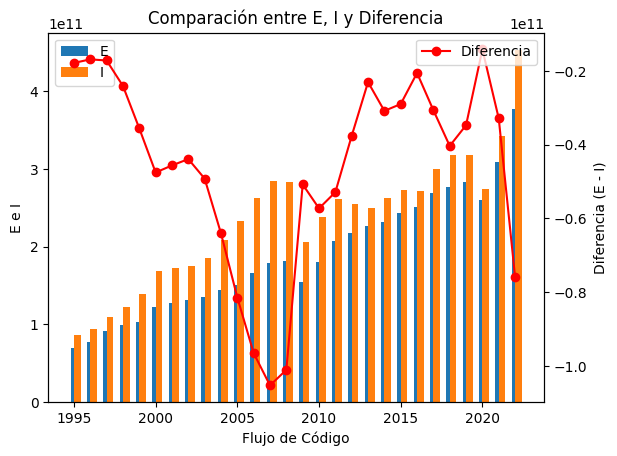

In [21]:
# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Crear barras para E e I usando el índice como las etiquetas del eje x
ax1.bar(pivot_df.index, pivot_df['E'], width=0.4, align='center', label='E')
ax1.bar(pivot_df.index, pivot_df['I'], width=0.4, align='edge', label='I')

# Configurar el eje y (ax1)
ax1.set_ylabel('E e I')
ax1.set_xlabel('Flujo de Código')
ax1.legend()

# Crear un segundo eje (ax2) para la diferencia
ax2 = ax1.twinx()
ax2.plot(pivot_df.index, pivot_df['diferencia_E_I'], marker='o', linestyle='-', color='r', label='Diferencia')
ax2.set_ylabel('Diferencia (E - I)')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.title('Comparación entre E, I y Diferencia')
plt.show()

En este gráfico podemos ver como el saldo de la balanza comercial (Diferencia) ha sido negativo en todo el periodo de estudio (eje derecho), si bien no se llega a los niveles de 2007, se puede observar que esa diferencia año a año se hace más grande, cada vez se importa por más valor de lo que se exporta

In [22]:
pivot_df_reset = pivot_df.reset_index()
pivot_df_reset.head()

flujo_codigo,index,E,I,diferencia_E_I
0,1995,6.928004e+10,8.713251e+10,-1.785248e+10
1,1996,7.727814e+10,9.417237e+10,-1.689423e+10
2,1997,9.226933e+10,1.094676e+11,-1.719825e+10
3,1998,9.873874e+10,1.228560e+11,-2.411723e+10
4,1999,1.034699e+11,1.390929e+11,-3.562292e+10


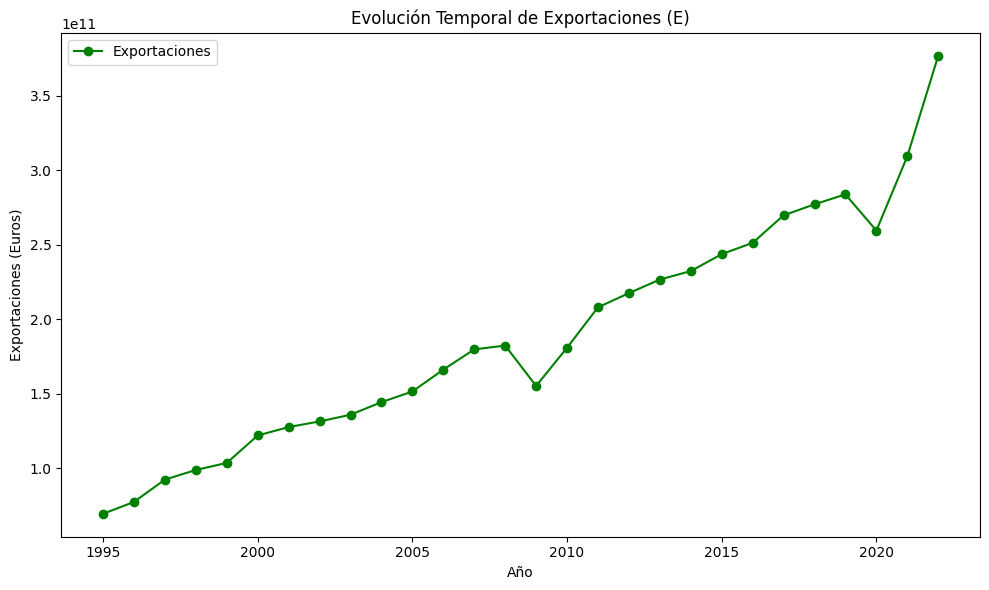

In [23]:
# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(pivot_df_reset['index'], pivot_df_reset['E'], marker='o', linestyle='-', color='g', label='Exportaciones')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Exportaciones (Euros)')
plt.title('Evolución Temporal de Exportaciones (E)')

# Mostrar el gráfico
plt.legend()
plt.tight_layout()
plt.show()


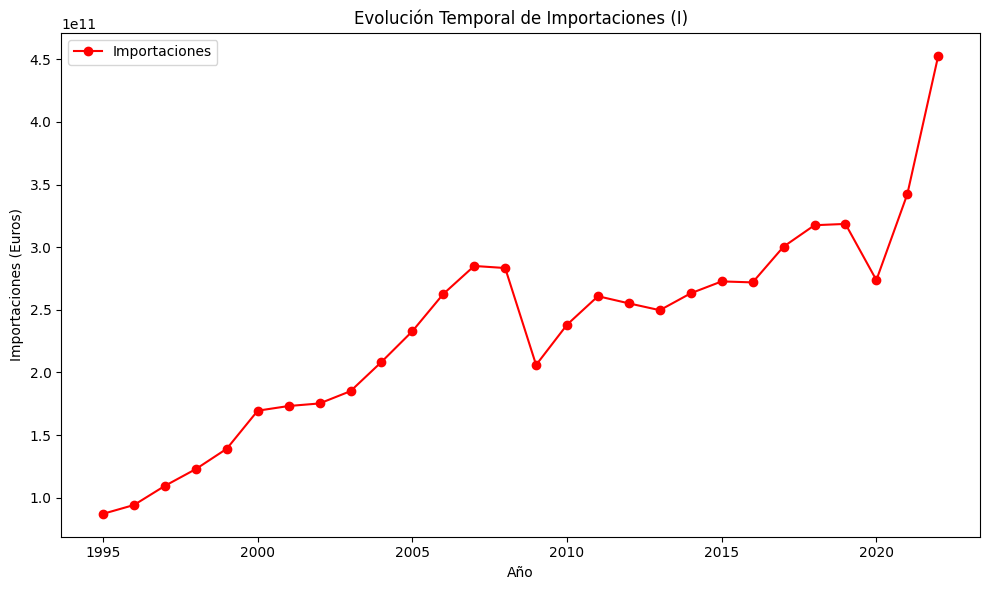

In [24]:
# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(pivot_df_reset['index'], pivot_df_reset['I'], marker='o', linestyle='-', color='r', label='Importaciones')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Importaciones (Euros)')
plt.title('Evolución Temporal de Importaciones (I)')

# Mostrar el gráfico
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# Agrupar por 'flujo_codigo' y 'periodo_anio' y sumar los valores de 'euros'
df_total_flujo_codigo_anio = df_ci.groupby(['flujo_codigo', 'region'])['euros'].sum().reset_index()

# Utilizar pivot para convertir los valores de 'flujo_codigo' en columnas
pivot_cont = df_total_flujo_codigo_anio.pivot(index='region', columns='flujo_codigo', values='euros').reset_index()

# Establecer 'periodo_anio' como el nuevo índice
pivot_cont.set_index('region', inplace=True)
pivot_cont.index.name = None

pivot_cont['diferencia_E_I'] = pivot_cont['E'] - pivot_cont['I']

pivot_cont

flujo_codigo,E,I,diferencia_E_I
América,5.603706e+11,6.881238e+11,-1.277533e+11
Antártida,1.201817e+07,8.335744e+06,3.682430e+06
Asia,4.236054e+11,1.177453e+12,-7.538481e+11
Europa,3.959668e+12,4.126369e+12,-1.667010e+11
Oceanía,3.529682e+10,2.271962e+10,1.257720e+10
África,2.951399e+11,5.368554e+11,-2.417155e+11


En este DF podemos observar como el saldo comercial con los principales continentes con los que comerciamos es negativo 

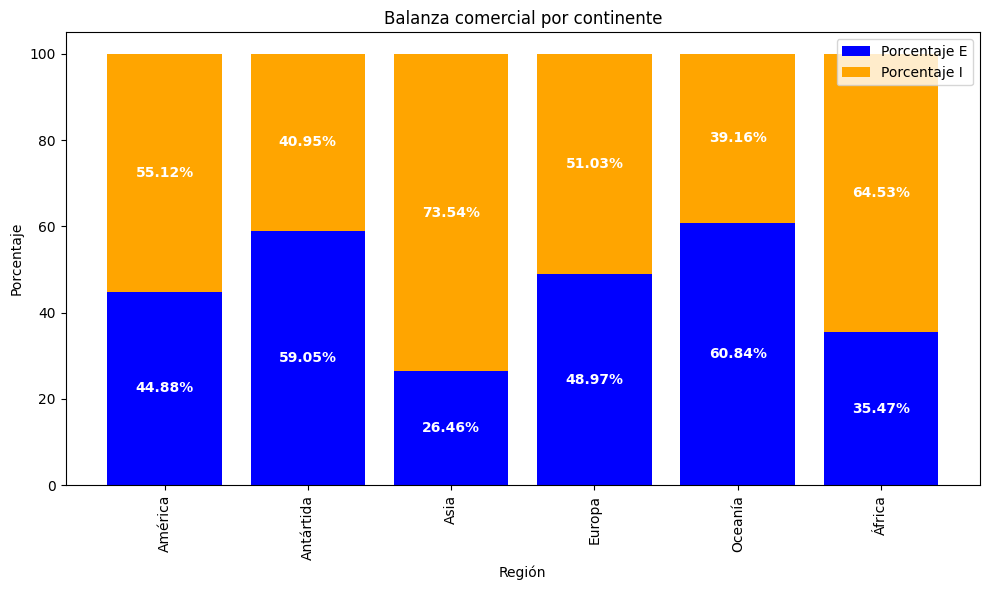

In [33]:
# Calcular el total de E + I y los porcentajes de E e I
pivot_cont['total'] = pivot_cont['E'] + pivot_cont['I']
pivot_cont['porcentaje_E'] = (pivot_cont['E'] / pivot_cont['total']) * 100
pivot_cont['porcentaje_I'] = (pivot_cont['I'] / pivot_cont['total']) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Barras para los porcentajes de E e I
bar1 = plt.bar(pivot_cont.index, pivot_cont['porcentaje_E'], label='Porcentaje E', color='blue')
bar2 = plt.bar(pivot_cont.index, pivot_cont['porcentaje_I'], bottom=pivot_cont['porcentaje_E'], label='Porcentaje I', color='orange')

# Agregar etiquetas con los valores de los porcentajes
for bar, label in zip(bar1, pivot_cont['porcentaje_E']):
    yval = bar.get_height() / 2
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{label:.2f}%', ha='center', va='center', color='white', fontweight='bold')

for bar, label1, label2 in zip(bar2, pivot_cont['porcentaje_E'], pivot_cont['porcentaje_I']):
    yval = bar.get_y() + bar.get_height() / 2
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{label2:.2f}%', ha='center', va='center', color='white', fontweight='bold')

plt.xlabel('Región')
plt.ylabel('Porcentaje')
plt.title('Balanza comercial por continente')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Representación porcentual de la balanza comercial por continentes.  
Podemos ver que la mayor diferencia porcentual entre EXP e IMP se da en ASIA, exportamos a Asia un 25% respecto de lo que importamos. Es el continente con el mayor saldo comercial negativo.

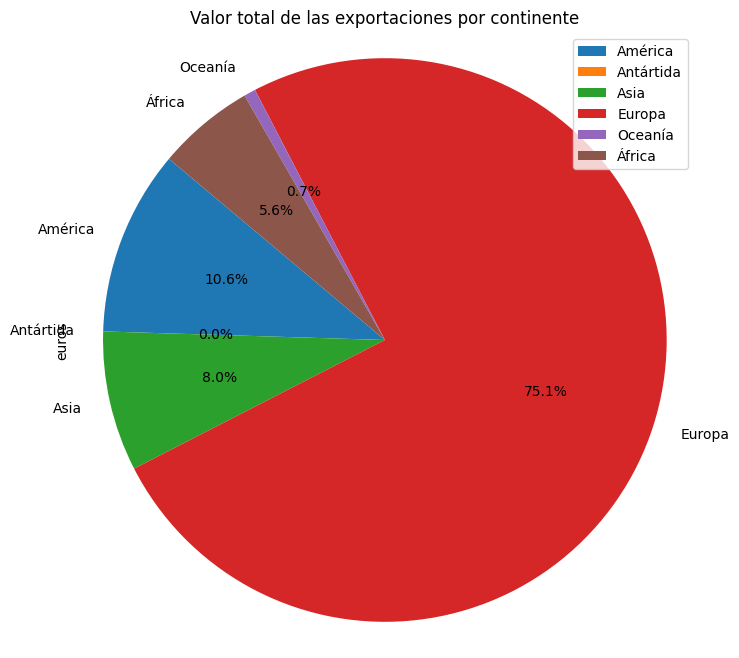

In [ ]:
df_region = df_ci[df_ci['flujo_codigo'] == 'E'].groupby('region')['euros'].sum()

# Crear un gráfico circular con las sumas de euros por región
plt.figure(figsize=(8, 8))
df_region.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Valor total de las exportaciones por continente')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.legend(loc='best')  # Mostrar la leyenda en la mejor posición
plt.show()

Podemos observar que el 75% de las EXP las hacemos a EUROPA  
AMERICA (norte y sur) supone un 10%   
ASIA es el tercero, con un 8%

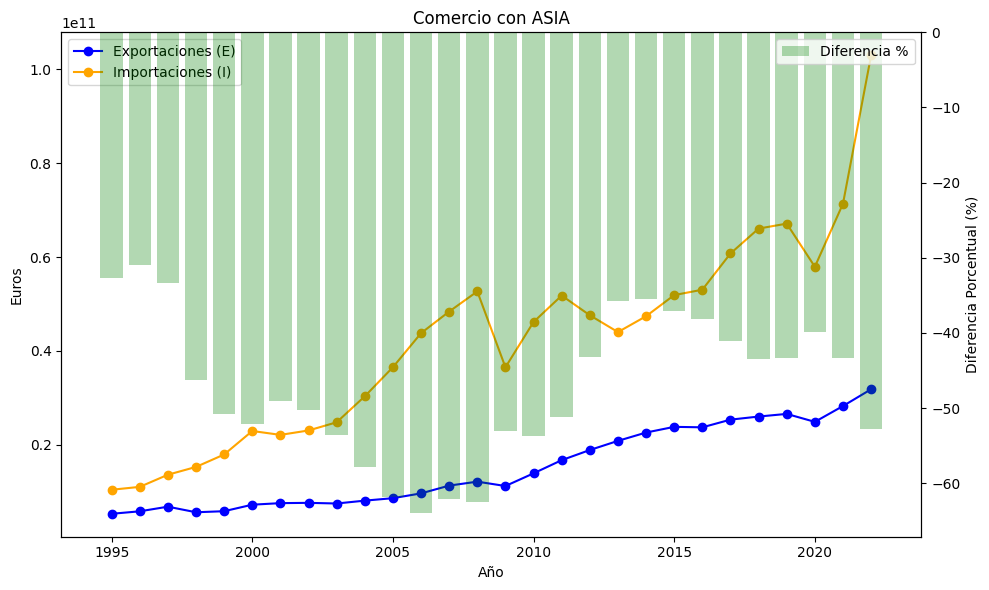

In [ ]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame por región y los flujos códigos 'E' e 'I'
df_asia = df_ci[(df_ci['region'] == 'Asia') & df_ci['flujo_codigo'].isin(['E', 'I'])]

# Crear un DataFrame pivote para los flujos códigos 'E' e 'I' por año
pivot_asia = df_asia.pivot_table(index='periodo_anio', columns='flujo_codigo', values='euros', aggfunc='sum').reset_index()

# Calcular la diferencia porcentual entre exportaciones e importaciones
pivot_asia['diferencia_porcentual'] = ((pivot_asia['E'] - pivot_asia['I']) / pivot_asia[['E', 'I']].sum(axis=1)) * 100

# Crear el gráfico de barras y líneas combinadas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las exportaciones e importaciones
ax1.plot(pivot_asia['periodo_anio'], pivot_asia['E'], marker='o', linestyle='-', color='blue', label='Exportaciones (E)')
ax1.plot(pivot_asia['periodo_anio'], pivot_asia['I'], marker='o', linestyle='-', color='orange', label='Importaciones (I)')
ax1.set_xlabel('Año')
ax1.set_ylabel('Euros')
ax1.set_title('Comercio con ASIA')
ax1.legend(loc='upper left')

# Crear un segundo eje para las barras de diferencia porcentual
ax2 = ax1.twinx()
ax2.bar(pivot_asia['periodo_anio'], pivot_asia['diferencia_porcentual'], color='green', alpha=0.3, label='Diferencia %')
ax2.set_ylabel('Diferencia Porcentual (%)')
ax2.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Nos centramos en Asia.  
En este gráfico podemos ver como han evolucionado las exportaciones e importaciones al continente asiático, es de destacar el incremento de las importaciones a partir del COVID, lo que hace que esa diferencia se esté incrementando (valor negativo)

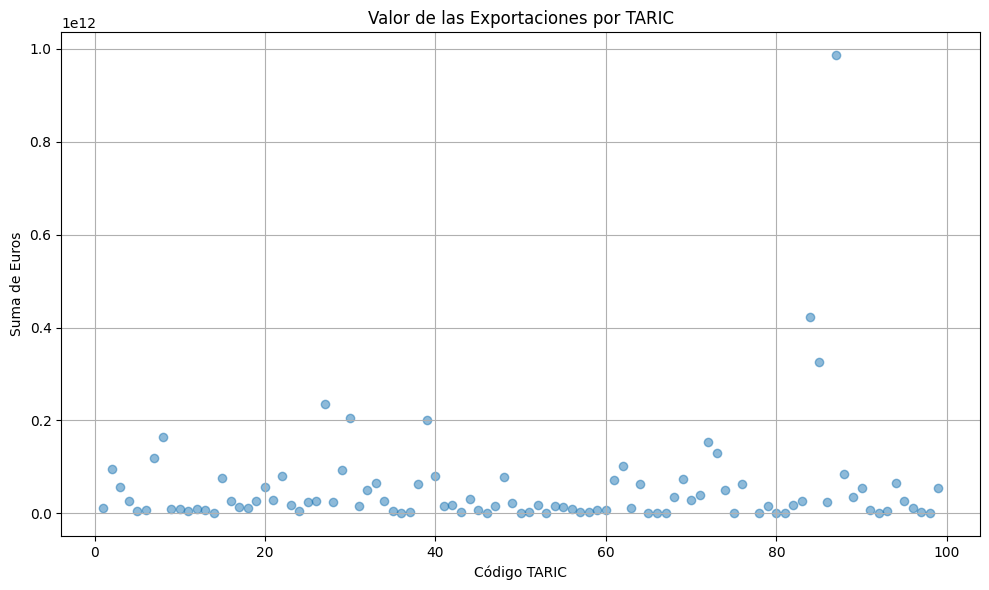

In [ ]:
# Filtrar el DataFrame por exportaciones (flujo_codigo = 'E')
exportaciones = df_ci[df_ci['flujo_codigo'] == 'E']

# Calcular la suma de euros por código TARIC
suma_euros_por_taric = exportaciones.groupby('taric')['euros'].sum()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(suma_euros_por_taric.index, suma_euros_por_taric.values, alpha=0.5)
plt.xlabel('Código TARIC')
plt.ylabel('Suma de Euros')
plt.title('Valor de las Exportaciones por TARIC')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Este gráfico de dispersión muestra el valor total de los bienes exportados desde 1995.  
Podemos ver 3 principales outliers, los 3 bienes que más se exportan desde España.  

Estos outliers son:   
1 - Código TARIC 87: Vehículos  
2 - Código TARIC 84: Máquinas y aparatos mecánicos  
3 - Código TARIC 85: Aparatos y material eléctrico  

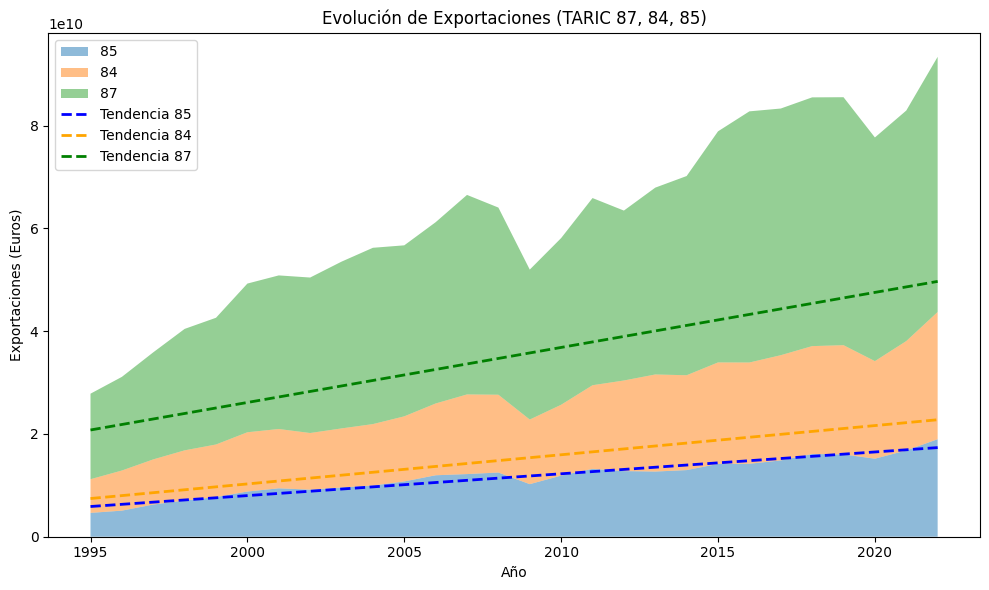

In [ ]:
# Filtrar el DataFrame por exportaciones (flujo_codigo = 'E') y los códigos TARIC 87, 84, 85
export_taric = df_ci[(df_ci['flujo_codigo'] == 'E') & (df_ci['taric'].isin([87, 84, 85]))]

# Crear un DataFrame pivote para los códigos TARIC 87, 84, 85 por año
pivot_export = export_taric.pivot_table(index='periodo_anio', columns='taric', values='euros', aggfunc='sum').fillna(0)

# Ordenar las columnas de pivot_export de menor a mayor
pivot_export = pivot_export[[85, 84, 87]]

# Crear el gráfico de área con solapamiento
plt.figure(figsize=(10, 6))

# Trazar las áreas de las taric
plt.stackplot(pivot_export.index, pivot_export[85], pivot_export[84], pivot_export[87],
              labels=['85', '84', '87'], alpha=0.5)

# Añadir las tendencias lineales
colors = ['blue', 'orange', 'green']  # Nuevos colores para las líneas de tendencia
for taric, color in zip(pivot_export.columns, colors):
    coeficientes = np.polyfit(pivot_export.index, pivot_export[taric], 1)
    tendencia_lineal = np.poly1d(coeficientes)
    plt.plot(pivot_export.index, tendencia_lineal(pivot_export.index), label=f'Tendencia {taric}', color=color, linestyle='--', linewidth=2)

plt.xlabel('Año')
plt.ylabel('Exportaciones (Euros)')
plt.title('Evolución de Exportaciones (TARIC 87, 84, 85)')
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Las exportaciones muestran una tendencia alcista, sin embargo, se observan interrupciones notables en dos períodos específicos:   
-Crisis financiera del 2008.  
-Pandemia de COVID-19 en 2019.  
  
Estos eventos afectaron significativamente el flujo y crecimiento de las exportaciones hacia Asia.  
Si bien es cierto, se han recuperado los niveles previos a la pandemia.

In [ ]:
export_taric

,flujo_codigo,periodo_anio,pais_nombre,taric,euros,region
3,E,2000,Afganistán,84,88668.92,Asia
4,E,2000,Afganistán,85,3966.68,Asia
5,E,2000,Afganistán,87,36645.37,Asia
39,E,2000,Albania,84,128959.42,Europa
40,E,2000,Albania,85,34893.54,Europa
...,...,...,...,...,...,...
365504,E,1999,Zambia,85,226432.86,África
365505,E,1999,Zambia,87,64528.00,África
365544,E,1999,Zimbabwe,84,1919503.56,África
365545,E,1999,Zimbabwe,85,423823.27,África


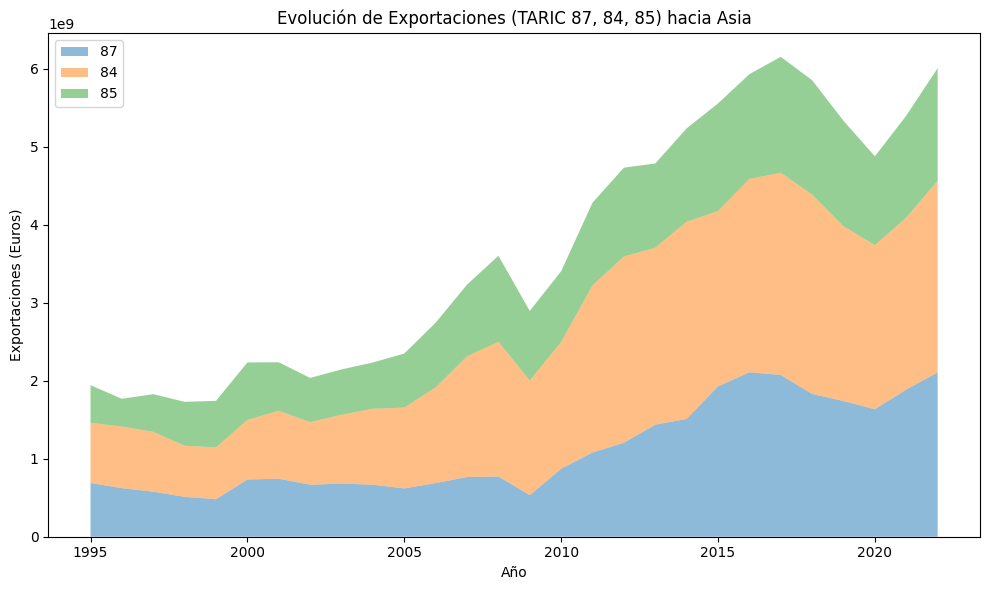

In [ ]:
# Filtrar el DataFrame por exportaciones (flujo_codigo = 'E') hacia Asia (region = 'ASIA') y los códigos TARIC 87, 84, 85
export_asia_taric = df_ci[(df_ci['flujo_codigo'] == 'E') & (df_ci['region'] == 'Asia') & (df_ci['taric'].isin([87, 84, 85]))]

# Crear un DataFrame pivote para los códigos TARIC 87, 84, 85 por año
pivot_export_asia = export_asia_taric.pivot_table(index='periodo_anio', columns='taric', values='euros', aggfunc='sum').fillna(0)

# Crear el gráfico de área
plt.figure(figsize=(10, 6))
plt.stackplot(pivot_export_asia.index, pivot_export_asia[87], pivot_export_asia[84], pivot_export_asia[85],
              labels=['87', '84', '85'], alpha=0.5)
plt.xlabel('Año')
plt.ylabel('Exportaciones (Euros)')
plt.title('Evolución de Exportaciones (TARIC 87, 84, 85) hacia Asia')
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Este gráfico es muy similar al anterior, pero sólo muestra las EXP a ASIA de las taric 84, 85 y 87

# CODIGO CUENTA FINANCIERA

In [ ]:
ruta_archivo = r'C:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\EDA_Entrega\src\data\banco_espana\inversion_extranjera_bruta.xlsx'

# Cargar el archivo en un DataFrame saltando las primeras 5 filas
df_ie = pd.read_excel(ruta_archivo, index_col=0)

df_ie

,2022,2013,2014,1997,1998,1995,1994,1996,2001,2002,...,2012,2015,2016,2017,2018,2019,1999,2000,2020,2021
"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",45826.19,72307.39,420148.38,53059.71,34655.67,102295.15,46949.38,55206.57,51061.39,35435.50,...,31490.37,520392.38,336452.89,312274.61,201663.34,86462.07,70756.89,67817.86,181772.42,293429.35
02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,22178.03,49.84,3.00,2640.95,2710.46,206.72,566.56,486.52,781.62,442.11,...,56.10,17737.87,0.00,1205.70,12.40,2900.36,12.02,1163.88,2492.09,1083.90
03 PESCA Y ACUICULTURA,712.49,178.31,3678.15,233.25,2701.14,5534.66,6225.20,4694.31,1627.31,2802.52,...,45085.63,1064.10,37699.84,3023.55,32859.10,176103.57,1504.69,1688.18,1165.67,756.00
"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,330.56,6.00,116.77,NaN,961.62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.70,132.22,NaN,NaN
06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,3.00,7792.52,883253.53,24.49,509.20,364.75,0.00,132.22,169.49,70.01,...,113560.36,554.44,2838.38,772276.90,1899.41,1979.08,3176.35,30.05,7247.95,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",12.85,0.00,13.43,23366.24,11.00,427.86,1513.90,17657.63,20412.82,11159.68,...,12.00,16.60,7.25,136.05,3358.73,27.58,34364.13,57211.32,3.30,9.00
96 OTROS SERVICIOS PERSONALES,1259.80,463.75,258972.80,6287.02,72276.71,2356.72,2864.22,1005.84,11563.80,13135.23,...,7550.38,40589.54,17496.89,164119.44,81207.24,69048.85,20326.70,77844.35,15107.74,39458.39
97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,NaN,0.00,1.50,NaN,NaN,NaN,NaN,NaN,601.01,NaN,...,0.00,0.00,0.00,3.00,3.05,0.00,3.00,NaN,1696.68,3.00
98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,400.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ie.fillna(0, inplace=True)

In [ ]:
df_nottransposed = df_ie
df_transposed = df_ie.T
df_ie = df_transposed

In [ ]:
# Convertir los índices (en este caso, los años) a strings
df_ie.index = df_ie.index.astype(str)

# Ordenar el DataFrame por los índices (años) de forma ascendente
df_ie = df_ie.sort_index()

In [ ]:
df_ie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1994 to 2022
Data columns (total 88 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS     29 non-null     float64
 1   02 SILVICULTURA Y EXPLOTACIÓN FORESTAL                   29 non-null     float64
 2   03 PESCA Y ACUICULTURA                                   29 non-null     float64
 3   05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO              29 non-null     float64
 4   06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL         29 non-null     float64
 5   07 EXTRACCIÓN DE MINERALES METÁLICOS                     29 non-null     float64
 6   08 OTRAS INDUSTRIAS EXTRACTIVAS                          29 non-null     float64
 7   09 ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS     29 non-null     float64
 8   10 INDUSTRIA DE LA ALIMENTACIÓN 

**Dataset:**  
df
 
**Descripción:**  
Datos sobre la inversión extranjera directa (IED) en España, expresada   

**Periodo:**  
1994 - 2022

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS|Nos indica la IED destinada a este sector|Numérica contínua|2|||
|...|...|...|...|...|...|
|99 ACTIV. ORGANIZACIONES Y ORGANISMOS EXTRATERRITORIAL|Nos indica la IED destinada a este sector|Numérica contínua|2|||
|total|Nos indica la IED por año|Numérica contínua|1|||


In [ ]:
# Convertir todas las columnas (excepto el índice) a tipo float
df_ie.iloc[:, 1:] = df_ie.iloc[:, 1:].astype(float)

# Sumar solo las columnas que son de tipo float y guardar el resultado en una nueva columna llamada 'Suma'
df_ie['total'] = df_ie.iloc[:, 1:].sum(axis=1)

df_total = df_ie[['total']].copy()
df_total

,total
1994,6418889.80
1995,5329764.85
1996,5542089.73
1997,5712581.52
1998,8931718.00
1999,11422865.96
2000,26028859.43
2001,15504639.80
2002,11596931.46
2003,9821659.82


En este DF tenemos el total de IED año a año (miles de millones)

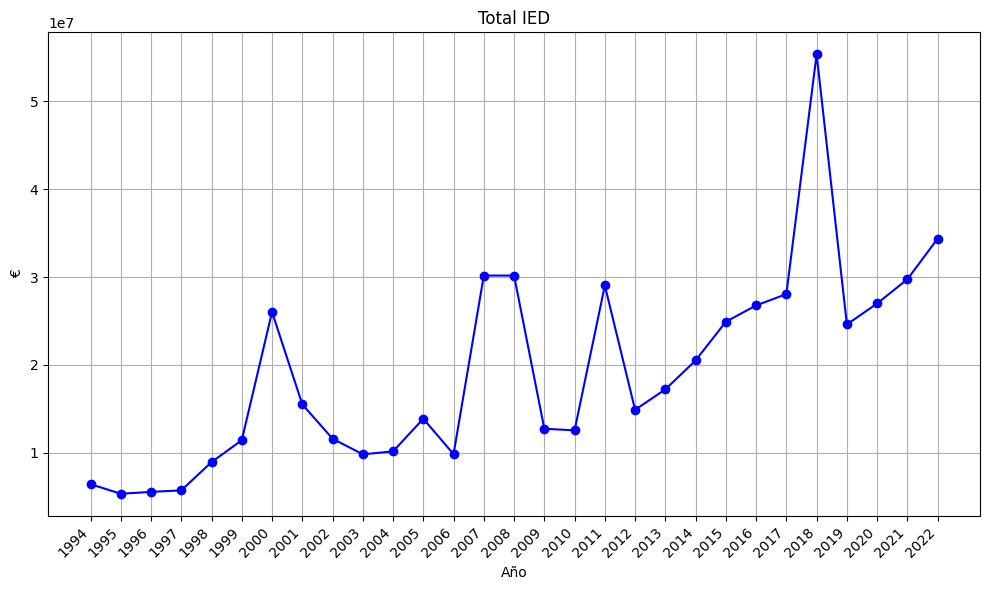

In [ ]:
# Crear el gráfico temporal con los ticks del eje x en diagonal
plt.figure(figsize=(10, 6))
plt.plot(df_total.index, df_total['total'], marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('€')
plt.title('Total IED')
plt.grid(True)

# Rotar los ticks del eje x en diagonal
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Mostrar el gráfico
plt.show()



En este gráfico tenemos la evolución temporal de la inversion extranjera directa  
Hay una clara tendencia positiva, al ser la inversión tan volátil, se ven importantes picos con descensos bruscos, que pueden ser explicados en parte por los siguientes eventos económicos globales:

| **Crisis**                              | **Contexto**                                             | **Impacto en España**                                    |
|-------------------------------------|------------------------------------------------------|------------------------------------------------------|
| Burbuja Empresas "Dot-com" (2000)   | Auge especulativo en empresas de tecnología           | Volatilidad en mercados, efectos en inversión y comercio |
| Crisis Financiera Global (2008)     | Colapso de instituciones financieras, burbuja inmobiliaria | Caída en exportaciones, impacto en sector financiero |
| Crisis Bancaria (2012)              | Rescate bancario, problemas en sector financiero      | Inestabilidad financiera, impacto en confianza        |
| Pandemia COVID-19 (2020)            | Crisis sanitaria global, paralización económica       | Impacto en sectores clave, recesión económica         |

In [ ]:
df_total['variacion_porcentual'] = df_total['total'].pct_change() * 100
df_total['variacion_porcentual'] = df_total['variacion_porcentual'].round(2)
df_total

,total,variacion_porcentual
1994,6418889.80,NaN
1995,5329764.85,-16.97
1996,5542089.73,3.98
1997,5712581.52,3.08
1998,8931718.00,56.35
1999,11422865.96,27.89
2000,26028859.43,127.87
2001,15504639.80,-40.43
2002,11596931.46,-25.20
2003,9821659.82,-15.31


In [ ]:
# Utilizo este DF para poder agrupar y reducir las categorias
df_nottransposed

,2022,2013,2014,1997,1998,1995,1994,1996,2001,2002,...,2012,2015,2016,2017,2018,2019,1999,2000,2020,2021
"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",45826.19,72307.39,420148.38,53059.71,34655.67,102295.15,46949.38,55206.57,51061.39,35435.50,...,31490.37,520392.38,336452.89,312274.61,201663.34,86462.07,70756.89,67817.86,181772.42,293429.35
02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,22178.03,49.84,3.00,2640.95,2710.46,206.72,566.56,486.52,781.62,442.11,...,56.10,17737.87,0.00,1205.70,12.40,2900.36,12.02,1163.88,2492.09,1083.90
03 PESCA Y ACUICULTURA,712.49,178.31,3678.15,233.25,2701.14,5534.66,6225.20,4694.31,1627.31,2802.52,...,45085.63,1064.10,37699.84,3023.55,32859.10,176103.57,1504.69,1688.18,1165.67,756.00
"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",0.00,0.00,0.00,330.56,6.00,116.77,0.00,961.62,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.70,132.22,0.00,0.00
06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,3.00,7792.52,883253.53,24.49,509.20,364.75,0.00,132.22,169.49,70.01,...,113560.36,554.44,2838.38,772276.90,1899.41,1979.08,3176.35,30.05,7247.95,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",12.85,0.00,13.43,23366.24,11.00,427.86,1513.90,17657.63,20412.82,11159.68,...,12.00,16.60,7.25,136.05,3358.73,27.58,34364.13,57211.32,3.30,9.00
96 OTROS SERVICIOS PERSONALES,1259.80,463.75,258972.80,6287.02,72276.71,2356.72,2864.22,1005.84,11563.80,13135.23,...,7550.38,40589.54,17496.89,164119.44,81207.24,69048.85,20326.70,77844.35,15107.74,39458.39
97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,0.00,0.00,1.50,0.00,0.00,0.00,0.00,0.00,601.01,0.00,...,0.00,0.00,0.00,3.00,3.05,0.00,3.00,0.00,1696.68,3.00
98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,400.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
categorias = {
    'AGRICULTURA, PESCA, GANADERÍA': ['01', '03', '02'],
    'FINANZAS/SEGUROS/ASESORIAS': ['64', '41', '65', '66', '62', '55', '73', '58', '70', '56', '71', '82', '69', '63', '81', '74', '96', '39', '80', '88', '84'],
    'MAQUINARIA E INDUSTRIA': ['10', '23', '24', '29', '27', '28', '17', '30', '22', '25', '11', '45', '26', '16', '12', '31', '33', '32', '15', '95'],
    'OTROS': ['59', '60', '85', '92', '78', '18', '53', '90', '91', '94', '75', '97', '98'],
    'REAL STATE/HOSPITALITY/ENTERTAINMENT': ['68', '93', '86', '77', '79'],
    'RETAIL/COMERCIO': ['46', '47', '72', '13', '14'],
    'SECTOR ENERGÉTICO/EXTRACTIVO': ['35', '19', '36', '38', '06', '08', '07', '87', '09', '37', '05', '99'],
    'SECTOR FARMACÉUTICO': ['21'],
    'SECTOR QUÍMICO': ['20'],
    'TELECOMUNICACIONES': ['61'],
    'TRANSPORTE E INFRAESTRUCTURAS': ['52', '51', '43', '42', '49', '50']
}


In [ ]:
# Función para asignar la categoría basada en los dos primeros dígitos del índice
def asignar_categoria(dos_digitos):
    dos_digitos_str = str(dos_digitos)
    for categoria, digitos in categorias.items():
        if dos_digitos_str in digitos:
            return categoria
    return 'NO ASIGNADO'  # O cualquier valor que quieras asignar si no hay coincidencia

# Aplicar la función a los dos primeros dígitos del índice para crear una nueva columna 'categoria'
df_nottransposed['categoria'] = df_nottransposed.index.map(lambda x: asignar_categoria(x[:2]))

df_nottransposed

,2022,2013,2014,1997,1998,1995,1994,1996,2001,2002,...,2015,2016,2017,2018,2019,1999,2000,2020,2021,categoria
"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACIONADOS",45826.19,72307.39,420148.38,53059.71,34655.67,102295.15,46949.38,55206.57,51061.39,35435.50,...,520392.38,336452.89,312274.61,201663.34,86462.07,70756.89,67817.86,181772.42,293429.35,"AGRICULTURA, PESCA, GANADERÍA"
02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,22178.03,49.84,3.00,2640.95,2710.46,206.72,566.56,486.52,781.62,442.11,...,17737.87,0.00,1205.70,12.40,2900.36,12.02,1163.88,2492.09,1083.90,"AGRICULTURA, PESCA, GANADERÍA"
03 PESCA Y ACUICULTURA,712.49,178.31,3678.15,233.25,2701.14,5534.66,6225.20,4694.31,1627.31,2802.52,...,1064.10,37699.84,3023.55,32859.10,176103.57,1504.69,1688.18,1165.67,756.00,"AGRICULTURA, PESCA, GANADERÍA"
"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",0.00,0.00,0.00,330.56,6.00,116.77,0.00,961.62,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.70,132.22,0.00,0.00,SECTOR ENERGÉTICO/EXTRACTIVO
06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,3.00,7792.52,883253.53,24.49,509.20,364.75,0.00,132.22,169.49,70.01,...,554.44,2838.38,772276.90,1899.41,1979.08,3176.35,30.05,7247.95,3.00,SECTOR ENERGÉTICO/EXTRACTIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"95 REPARACIÓN ORDENADORES, EFECTOS PERSONALES",12.85,0.00,13.43,23366.24,11.00,427.86,1513.90,17657.63,20412.82,11159.68,...,16.60,7.25,136.05,3358.73,27.58,34364.13,57211.32,3.30,9.00,MAQUINARIA E INDUSTRIA
96 OTROS SERVICIOS PERSONALES,1259.80,463.75,258972.80,6287.02,72276.71,2356.72,2864.22,1005.84,11563.80,13135.23,...,40589.54,17496.89,164119.44,81207.24,69048.85,20326.70,77844.35,15107.74,39458.39,FINANZAS/SEGUROS/ASESORIAS
97 ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES,0.00,0.00,1.50,0.00,0.00,0.00,0.00,0.00,601.01,0.00,...,0.00,0.00,3.00,3.05,0.00,3.00,0.00,1696.68,3.00,OTROS
98 ACTIV. HOGARES COMO PRODUC. BIENES Y SERV,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,400.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,OTROS


In [ ]:
# Agrupar por la columna 'categoria' y eliminar el índice
grupo_por_categoria = df_nottransposed.groupby('categoria').sum().reset_index()

# Obtener la lista de columnas ordenadas de menor a mayor 
columnas_ordenadas = grupo_por_categoria.columns[1:].astype(int).sort_values().astype(str).tolist()

# Reorganizar el DataFrame con las columnas ordenadas
grupo_por_categoria = grupo_por_categoria[['categoria'] + columnas_ordenadas]

grupo_por_categoria


,categoria,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"AGRICULTURA, PESCA, GANADERÍA",53741.14,108036.53,60387.40,55933.91,40067.27,72273.60,70669.92,53470.32,38680.13,...,72535.54,423829.53,539194.35,374152.73,316503.86,234534.84,265466.00,185430.18,295269.25,68716.71
1,FINANZAS/SEGUROS/ASESORIAS,1660427.25,1338240.83,1329127.43,1095317.55,3427229.53,4314517.13,5801328.33,4204758.56,3821630.96,...,5651152.25,6199714.84,7504423.26,7389326.60,5959508.85,11111195.06,9771597.47,14084490.25,5996308.76,5981707.03
2,MAQUINARIA E INDUSTRIA,2699289.10,870601.20,2008794.32,1815560.61,2411715.77,2492406.92,1598376.59,6236148.57,1384622.02,...,2030334.13,1614207.08,3134350.08,5196557.96,4144900.20,4694027.95,4024836.90,3239253.60,3671827.93,10122803.45
3,OTROS,81305.33,92216.27,203401.02,87444.69,185378.93,394533.72,875119.24,449177.62,172823.35,...,321318.11,153611.83,1175291.10,840836.63,126501.46,1963974.99,933683.13,340062.48,540664.99,1364557.30
4,REAL STATE/HOSPITALITY/ENTERTAINMENT,464677.50,298523.97,348189.74,407873.63,697249.12,569125.65,922392.23,788007.03,1028374.72,...,3060239.81,3550521.38,4809346.18,3450999.61,4706131.80,5267207.74,3265304.82,1914200.22,2174936.97,5293996.92
5,RETAIL/COMERCIO,858709.24,811916.58,894846.35,1097240.19,1088927.18,729619.17,1245393.87,1102161.85,699355.01,...,988770.44,3897018.89,3177430.01,1584403.85,2515364.53,4669857.80,1825744.62,1500948.83,2563874.82,2592106.79
6,SECTOR ENERGÉTICO/EXTRACTIVO,89169.70,256403.04,111562.48,83565.99,185386.64,693619.42,46234.61,600091.73,1731178.95,...,1867004.77,2589996.58,3314403.81,5656260.05,4342436.80,4048245.19,1716514.96,1414229.91,6812135.79,4322798.46
7,SECTOR FARMACÉUTICO,168897.68,67394.29,108352.54,63510.11,47865.97,95878.62,30583.10,84477.67,20711.29,...,790930.00,234392.30,132712.29,85238.60,216287.06,107339.83,158908.74,44432.31,73973.84,155155.55
8,SECTOR QUÍMICO,272218.50,1331830.75,175500.91,104137.91,382945.29,969328.68,611282.01,191280.49,183682.61,...,73637.89,483759.75,219253.14,307873.25,318829.81,3214269.77,1148447.04,396190.30,308770.13,107055.96
9,TELECOMUNICACIONES,34742.18,126502.60,197526.52,869221.47,396894.38,623177.34,14465838.20,1694773.24,1704454.32,...,392151.30,348990.86,117848.90,52120.55,1571930.70,2482338.26,786338.44,2237454.20,1351551.15,2713428.22


In [ ]:
grupo_por_categoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   categoria  11 non-null     object 
 1   1994       11 non-null     float64
 2   1995       11 non-null     float64
 3   1996       11 non-null     float64
 4   1997       11 non-null     float64
 5   1998       11 non-null     float64
 6   1999       11 non-null     float64
 7   2000       11 non-null     float64
 8   2001       11 non-null     float64
 9   2002       11 non-null     float64
 10  2003       11 non-null     float64
 11  2004       11 non-null     float64
 12  2005       11 non-null     float64
 13  2006       11 non-null     float64
 14  2007       11 non-null     float64
 15  2008       11 non-null     float64
 16  2009       11 non-null     float64
 17  2010       11 non-null     float64
 18  2011       11 non-null     float64
 19  2012       11 non-null     float64
 20  2013       1

In [ ]:
# Eliminar la columna 'categoria' temporalmente para calcular la suma por fila
grupo_sin_categoria = grupo_por_categoria.drop(columns='categoria')

# Calcular la suma de todas las columnas (años) por fila
total_por_fila = grupo_sin_categoria.sum(axis=1)

# Agregar la columna de totales al DataFrame original
grupo_por_categoria['Total'] = total_por_fila

grupo_por_categoria


,categoria,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,"AGRICULTURA, PESCA, GANADERÍA",53741.14,108036.53,60387.40,55933.91,40067.27,72273.60,70669.92,53470.32,38680.13,...,423829.53,539194.35,374152.73,316503.86,234534.84,265466.00,185430.18,295269.25,68716.71,3.912167e+06
1,FINANZAS/SEGUROS/ASESORIAS,1660427.25,1338240.83,1329127.43,1095317.55,3427229.53,4314517.13,5801328.33,4204758.56,3821630.96,...,6199714.84,7504423.26,7389326.60,5959508.85,11111195.06,9771597.47,14084490.25,5996308.76,5981707.03,1.416888e+08
2,MAQUINARIA E INDUSTRIA,2699289.10,870601.20,2008794.32,1815560.61,2411715.77,2492406.92,1598376.59,6236148.57,1384622.02,...,1614207.08,3134350.08,5196557.96,4144900.20,4694027.95,4024836.90,3239253.60,3671827.93,10122803.45,8.410357e+07
3,OTROS,81305.33,92216.27,203401.02,87444.69,185378.93,394533.72,875119.24,449177.62,172823.35,...,153611.83,1175291.10,840836.63,126501.46,1963974.99,933683.13,340062.48,540664.99,1364557.30,1.342445e+07
4,REAL STATE/HOSPITALITY/ENTERTAINMENT,464677.50,298523.97,348189.74,407873.63,697249.12,569125.65,922392.23,788007.03,1028374.72,...,3550521.38,4809346.18,3450999.61,4706131.80,5267207.74,3265304.82,1914200.22,2174936.97,5293996.92,5.647241e+07
5,RETAIL/COMERCIO,858709.24,811916.58,894846.35,1097240.19,1088927.18,729619.17,1245393.87,1102161.85,699355.01,...,3897018.89,3177430.01,1584403.85,2515364.53,4669857.80,1825744.62,1500948.83,2563874.82,2592106.79,5.757302e+07
6,SECTOR ENERGÉTICO/EXTRACTIVO,89169.70,256403.04,111562.48,83565.99,185386.64,693619.42,46234.61,600091.73,1731178.95,...,2589996.58,3314403.81,5656260.05,4342436.80,4048245.19,1716514.96,1414229.91,6812135.79,4322798.46,8.140684e+07
7,SECTOR FARMACÉUTICO,168897.68,67394.29,108352.54,63510.11,47865.97,95878.62,30583.10,84477.67,20711.29,...,234392.30,132712.29,85238.60,216287.06,107339.83,158908.74,44432.31,73973.84,155155.55,4.224190e+06
8,SECTOR QUÍMICO,272218.50,1331830.75,175500.91,104137.91,382945.29,969328.68,611282.01,191280.49,183682.61,...,483759.75,219253.14,307873.25,318829.81,3214269.77,1148447.04,396190.30,308770.13,107055.96,1.607211e+07
9,TELECOMUNICACIONES,34742.18,126502.60,197526.52,869221.47,396894.38,623177.34,14465838.20,1694773.24,1704454.32,...,348990.86,117848.90,52120.55,1571930.70,2482338.26,786338.44,2237454.20,1351551.15,2713428.22,4.973382e+07


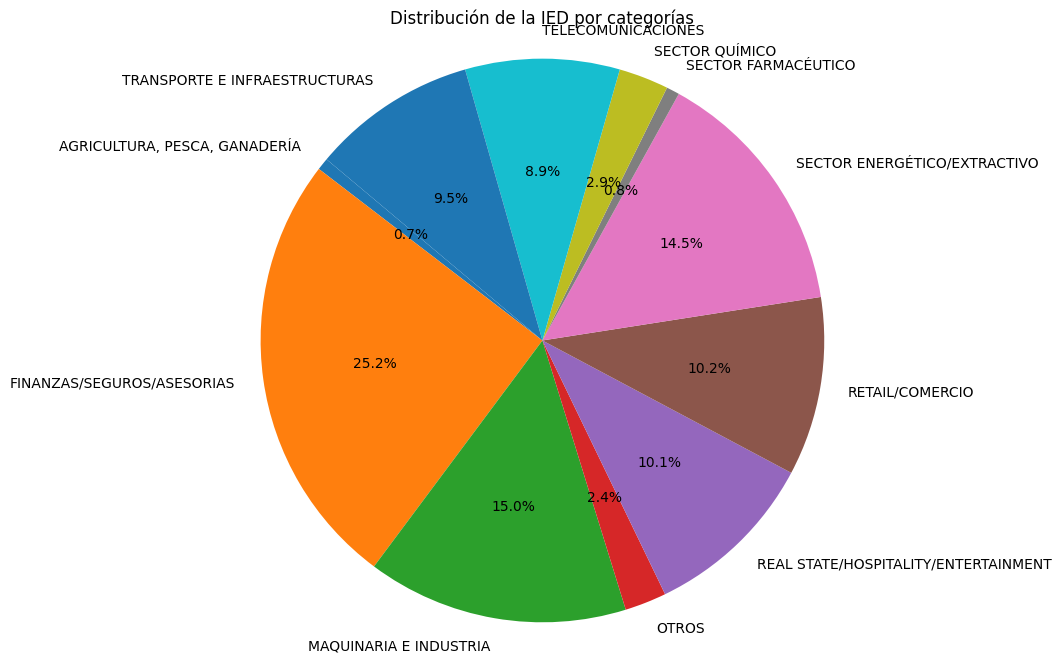

In [ ]:
# Gráfico circular con la columna 'categoria' y 'Total'
plt.figure(figsize=(8, 8))
plt.pie(grupo_por_categoria['Total'], labels=grupo_por_categoria['categoria'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.title('Distribución de la IED por categorías')
plt.show()

En el apartado anterior hemos observado bienes relacionados con la industria, la industria automotriz y la maquinaria.  
En este apartado, podemos observar cómo el 15% de la inversión extranjera directa va destinada hacia este sector, la segunda partida más importante.

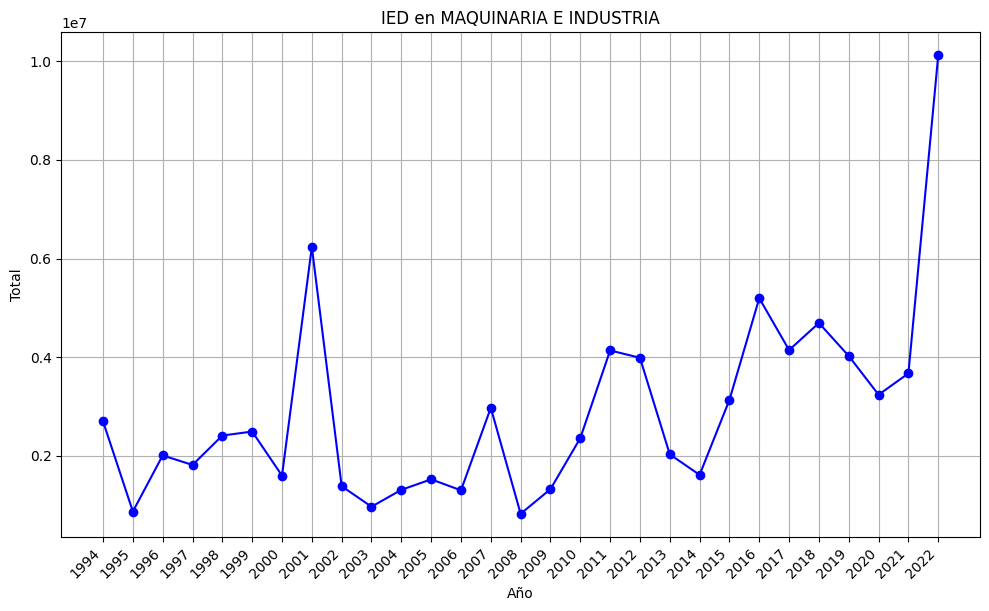

In [ ]:
# Filtrar el DataFrame por la categoría 'MAQUINARIA E INDUSTRIA'
categoria_seleccionada = grupo_por_categoria[grupo_por_categoria['categoria'] == 'MAQUINARIA E INDUSTRIA']

# Obtener las columnas de años (1994-2022)
columnas_años = grupo_por_categoria.columns[1:-1]

# Obtener los valores para la categoría 'MAQUINARIA E INDUSTRIA'
valores_categoria = categoria_seleccionada[columnas_años].values.flatten()

# Crear un gráfico de línea para la evolución temporal
plt.figure(figsize=(10, 6))
plt.plot(columnas_años, valores_categoria, marker='o', linestyle='-', color='b')
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('IED en MAQUINARIA E INDUSTRIA')
plt.grid(True)
plt.tight_layout()

# Rotar los ticks del eje x en diagonal
plt.xticks(rotation=45, ha='right')

plt.show()


Si analizamos la evolución temporal de la inversion (IED) en maquinaría, podemos observar el increible aumento que ha obtenido en el último año de estudio, en concreto, un 175%

In [ ]:
# Filtrar el DataFrame por la categoría 'MAQUINARIA E INDUSTRIA' y eliminar la columna 'categoria'
fila_maquinaria = grupo_por_categoria[grupo_por_categoria['categoria'] == 'MAQUINARIA E INDUSTRIA'].drop(columns='categoria')

# Transponer la fila de la categoría 'MAQUINARIA E INDUSTRIA'
fila_maquinaria = fila_maquinaria.T.reset_index()

# Renombrar las columnas
fila_maquinaria.columns = ['Año', 'Valor']

# Convertir la columna 'Valor' a tipo numérico (float) excluyendo el primer elemento (nombre de la fila)
fila_maquinaria['Valor'] = fila_maquinaria['Valor'].astype(float, errors='ignore')

# Calcular las variaciones porcentuales respecto al año anterior
fila_maquinaria['Variación %'] = fila_maquinaria['Valor'].pct_change() * 100

fila_maquinaria.tail()


,Año,Valor,Variación %
25,2019,4024836.90,-14.256222
26,2020,3239253.60,-19.518388
27,2021,3671827.93,13.354136
28,2022,10122803.45,175.688394
29,Total,84103572.27,730.832809


In [ ]:
# Eliminar las filas donde la columna 'año' es igual a 'Total'
fila_maquinaria_filtrado = fila_maquinaria.loc[fila_maquinaria['Año'] != 'Total']

# Convertir la columna de años a enteros si es necesario
fila_maquinaria_filtrado['Año'] = pd.to_numeric(fila_maquinaria_filtrado['Año'], errors='coerce')

# Eliminar filas con valores NaN después de la conversión
fila_maquinaria_filtrado = fila_maquinaria_filtrado.dropna(subset=['Año'])

# Filtrar las filas que estén en el rango de años 1995 a 2022
fila_maquinaria_filtrado = fila_maquinaria_filtrado[(fila_maquinaria_filtrado['Año'] >= 1995) & (fila_maquinaria_filtrado['Año'] <= 2022)]

fila_maquinaria_filtrado



C:\Users\julio\AppData\Local\Temp\ipykernel_5224\1290931452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fila_maquinaria_filtrado['Año'] = pd.to_numeric(fila_maquinaria_filtrado['Año'], errors='coerce')


,Año,Valor,Variación %
1,1995,870601.20,-67.747019
2,1996,2008794.32,130.736452
3,1997,1815560.61,-9.619388
4,1998,2411715.77,32.835872
5,1999,2492406.92,3.345798
6,2000,1598376.59,-35.870159
7,2001,6236148.57,290.155149
8,2002,1384622.02,-77.796840
9,2003,968740.50,-30.035744
10,2004,1310603.46,35.289426


In [ ]:
df_ci['taric'] = df_ci['taric'].astype(str)

# Filtrar el DataFrame por taric 84, 85 y 87
taric_filtradas = ['84', '85', '87']
df_filtrado_taric = df_ci[df_ci['taric'].str.startswith(tuple(taric_filtradas))]

# Agrupar por 'flujo_codigo' y 'periodo_anio' y sumar los valores de 'euros'
df_e_taric = df_filtrado_taric.groupby(['flujo_codigo', 'periodo_anio'])['euros'].sum().reset_index()

# Utilizar pivot para convertir los valores de 'flujo_codigo' en columnas
pivot_e_taric = df_e_taric.pivot(index='periodo_anio', columns='flujo_codigo', values='euros').reset_index()

pivot_e_taric


flujo_codigo,periodo_anio,E,I
0,1995,2.783134e+10,3.014978e+10
1,1996,3.110427e+10,3.384612e+10
2,1997,3.587736e+10,3.930686e+10
3,1998,4.043613e+10,4.812627e+10
4,1999,4.260413e+10,5.684148e+10
5,2000,4.925565e+10,6.509936e+10
6,2001,5.084438e+10,6.548775e+10
7,2002,5.043016e+10,6.413178e+10
8,2003,5.352006e+10,6.882092e+10
9,2004,5.621753e+10,7.862343e+10


In [ ]:
from scipy.stats import pearsonr

pearsonr(fila_maquinaria_filtrado["Valor"], pivot_e_taric["E"], alternative= "greater")

PearsonRResult(statistic=0.6007054943792296, pvalue=0.0003623887144853082)

Estadístico de correlación de Pearson (statistic): En este caso, el valor es aproximadamente 0.6007. Este valor indica la fuerza y la dirección de la correlación entre las dos variables, por lo que sugiere una correlación positiva moderadamente fuerte.  

Valor p (p-value): En este caso, el valor p es aproximadamente 0.00036. El valor p es la probabilidad de que la correlación observada sea pura casualidad. Un valor p pequeño (generalmente menor que 0.05) sugiere que la hipótesis puede ser nula.
Con nuestros datos, podemos sugerir que la correlación observada entre la IED (en maquinaría e industria) y las EXP (taric 84, 85 y 87) es probablemente significativa y no se debe simplemente al azar. 

Con estos datos podemos concluir que hay evidencia estadística para sugerir una correlación positiva significativa entre las dos variables.